In [17]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.cluster import KMeans
import warnings

In [18]:
df = pd.read_csv("Mall_Customers.csv")

In [19]:
df.drop('CustomerID', axis=1, inplace=True)

df.head()


,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [20]:
#Changing the gender column from categorical to numerical
df.loc[df.Gender == 'Male' ,'Gender'] = 1
df.loc[df.Gender == 'Female' ,'Gender'] = 0

df.Gender= df.Gender.astype(int)

df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [21]:


columns = df.columns.values.tolist()
for i in columns:
    if i != 'Gender':
        ss = StandardScaler()
        scaled = ss.fit_transform(df[[i]])
        df[i] = scaled
        

In [22]:
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,-1.424569,-1.738999,-0.434801
1,1,-1.281035,-1.738999,1.195704
2,0,-1.352802,-1.700830,-1.715913
3,0,-1.137502,-1.700830,1.040418
4,0,-0.563369,-1.662660,-0.395980
...,...,...,...,...
195,0,-0.276302,2.268791,1.118061
196,0,0.441365,2.497807,-0.861839
197,1,-0.491602,2.497807,0.923953
198,1,-0.491602,2.917671,-1.250054


In [23]:
df_x = df.drop('Gender', axis=1, inplace=False)
df_y = df.drop(['Age', 'Annual Income (k$)', 'Spending Score (1-100)'], axis=1, inplace=False)

In [24]:
df_x

,Age,Annual Income (k$),Spending Score (1-100)
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980
...,...,...,...
195,-0.276302,2.268791,1.118061
196,0.441365,2.497807,-0.861839
197,-0.491602,2.497807,0.923953
198,-0.491602,2.917671,-1.250054


In [25]:
df_y

,Gender
0,1
1,1
2,0
3,0
4,0
...,...
195,0
196,0
197,1
198,1


In [26]:
scaler_PCA = StandardScaler()
scaled_df = scaler_PCA.fit_transform(df_x)

scaled_df.shape

(200, 3)

In [27]:
pca = PCA(n_components=2)

pca.fit(scaled_df)

PCA(n_components=2)

In [28]:
x_pca = pca.transform(scaled_df)

In [29]:
x_pca.shape

(200, 2)

Text(0, 0.5, 'Second principle component')

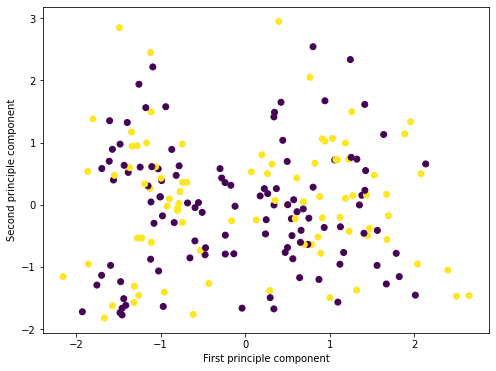

In [30]:
plt.figure(figsize = (8,6))
plt.scatter(x_pca[:,0], x_pca[:,1], c = df_y['Gender'])
plt.xlabel('First principle component')
plt.ylabel('Second principle component')

In [31]:
#the sample data in the pca modelling is been distributed throughout the graph.so it is difficult to predict pattern for the gender as output.

In [32]:
from sklearn.decomposition import PCA

feature_weight = []
variance_explained = []

# We can select upto 4 features as it is tha max

for n in range(1, 4):
    
    PCAmod = PCA(n_components=n)
    PCAmod.fit(df)
    
    # Store the model and variance
    variance_explained.append(PCAmod.explained_variance_ratio_.sum())
    
    # Calculate and store feature importances
    abs_feature_values = np.abs(PCAmod.components_).sum(axis=0)
    feature_weight.append(pd.DataFrame({'n':n, 
                                        'features': df.columns,
                                        'values':abs_feature_values/abs_feature_values.sum()}))
var = pd.DataFrame(variance_explained)
var

,0
0,0.409529
1,0.717696
2,0.924931


In [33]:
features_df = (pd.concat(feature_weight)
               .pivot(index='n', columns='features', values='values'))

features_df

features,Age,Annual Income (k$),Gender,Spending Score (1-100)
n,,,,
1,0.472654,0.029861,0.024996,0.472489
2,0.282668,0.402271,0.029621,0.285441
3,0.358674,0.261069,0.019778,0.360479


In [34]:
#*From the above dataframe,it is clear that Gender as a feature have the least importance in all out PCA lists.Age and
#Gender forms the maximum importaent duo followed closely by Annual Income

[Text(0.5, 0, 'Number of dimensions'),
 Text(0, 0.5, 'Percent explained variance'),
 Text(0.5, 1.0, 'Explained Variance vs Dimensions')]

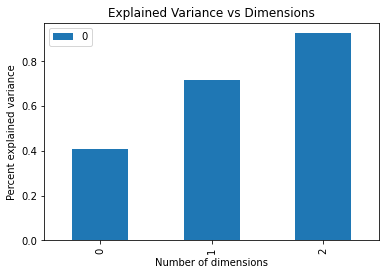

In [35]:
#Plotting the variance explanation
ax = var.plot(kind='bar')

ax.set(xlabel='Number of dimensions',
       ylabel='Percent explained variance',
       title='Explained Variance vs Dimensions')

In [36]:
#*So just with 2 dimesions,we can capture almost 72% of the dataset variance.
#If it is increased to 3 ,more than 92 percent can be captured ,so that we can reduce with a single or two features from 
#this dataset without losing much information.

In [37]:
#taking for behaviour pattern
df_M = pd.read_csv("Mall_Customers.csv")
df_M.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


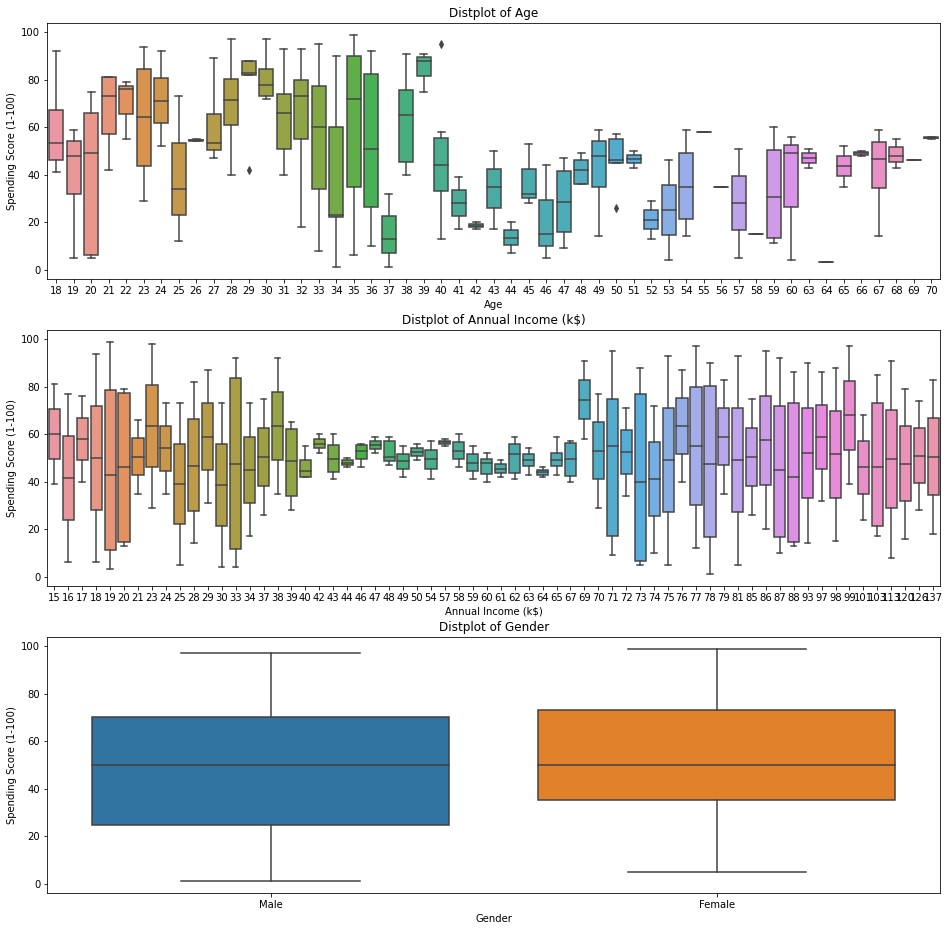

In [38]:
#BEHAVIOUR PATTERN

plt.figure(1 , figsize = (16 , 16))
n = 0
for x in ['Age' , 'Annual Income (k$)' , 'Gender']:
    n += 1
    plt.subplot(3 , 1 , n)
    sns.boxplot(x=x, y='Spending Score (1-100)', data=df_M)
    plt.title('Distplot of {}'.format(x))